In [1]:
# import docx
from __future__ import division
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, auc, roc_curve)
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, OneClassSVM
from statistics import stdev
from random import choice
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from numpy import interp

In [2]:
tf.get_logger().setLevel('ERROR')

In [5]:
#--------------------------------------
#Data
#--------------------------------------

df = pd.read_csv("/content/MRMR_selected_20_df_slopes_v2_13nov.csv", index_col=0)
print(df.head())
print(df.shape)

#First values: 0 - CNTRL, 1 - PD patients
#changed to: 1 - PD patients, 2 - CNTRL
df['target'].replace({0: 2}, inplace=True)

X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, shuffle=True)
base_fpr = np.linspace(0, 1, 101)


   Slope_38-50Hz_channel61  Slope_1-40Hz_channel76  Slope_38-42Hz_channel74  \
0                -6.780840               -0.798776                -3.408901   
1                -7.688050               -0.599249                -4.577953   
2                -6.755845               -0.731355                -5.151977   
3                -6.574627               -0.674148                -4.475134   
4                -6.793038               -0.980152                -4.041330   

   Slope_38-50Hz_channel11  Slope_38-50Hz_channel65  Slope_1-40Hz_channel42  \
0                -5.755406                -6.790540               -0.778664   
1                -5.908460                -7.704748               -0.749946   
2                -6.119969                -7.237387               -0.598631   
3                -6.009118                -6.130461               -0.658992   
4                -5.983246                -6.731877               -0.720868   

   Slope_38-50Hz_channel64  Slope_38-42Hz_channel9

In [6]:
#--------------------------------------
#Errors
#--------------------------------------

def predictionR(classifier, X_train, X_test, y_train, y_test):
    pipe = make_pipeline(StandardScaler(), classifier)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    return y_test, y_pred, pipe

def evaluationR(y, y_hat, title = 'Confusion Matrix'):
    cm = confusion_matrix(y, y_hat, labels=[1.0, 2.0])
    sensitivity = cm[0,0]/(cm[0,0] + cm[0,1])
    specificity = cm[1,1]/(cm[1,1] + cm[1,0])
    accuracy = accuracy_score(y, y_hat)
    fpr, tpr, thresholds = roc_curve(y, y_hat, pos_label=2)
    AUC = auc(fpr, tpr)
    tpr = interp(base_fpr, fpr, tpr)
    tpr[0] = 0.0
    return accuracy, sensitivity, specificity, AUC, tpr

def PRES(k, res_acc, res_sens, res_spec, res_AUC, tprs, file_name):
    print("%1d %4.2f  ±%4.2f    %4.2f ±%4.2f   %4.2f ±%4.2f   %4.2f ±%4.2f" % (k, 100*sum(res_acc)/len(res_acc), 100*stdev(res_acc), 100*sum(res_sens)/len(res_sens), 100*stdev(res_sens),
          100*sum(res_spec)/len(res_spec), 100*stdev(res_spec), 100*sum(res_AUC)/len(res_AUC), 100*stdev(res_AUC)))
    tprs = np.array(tprs)
    mean_tprs = tprs.mean(axis=0)
    std = tprs.std(axis=0)
    tprs_upper = np.minimum(mean_tprs + std, 1)
    tprs_lower = mean_tprs - std
    plt.plot(base_fpr, mean_tprs, 'b')
    plt.fill_between(base_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.3)

    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.text(x = 0.5, y = 0.2, s="AUC = %4.4f" % (sum(res_AUC)/len(res_AUC)))
    plt.title(file_name)
    plt.savefig(f'{file_name}.png', dpi=600)
    plt.show()

In [7]:
scaler = StandardScaler()

Streaming output truncated to the last 5000 lines.
22    1
18    2
5     2
9     2
3     2
19    2
4     2
16    2
32    1
7     2
11    2
Name: target, dtype: int64
logreg y_pred
[2 1 1 2 2 2 2 2 2 1 1 2 1 2]
[[1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]]
1/1 [==============================] - 0s 47ms/step
[[0.73620653]
 [0.1982341 ]
 [0.01720735]
 [0.884716  ]
 [0.9747653 ]
 [0.45528272]
 [0.8693526 ]
 [0.8852    ]
 [0.7545165 ]
 [0.2724806 ]
 [0.14727962]
 [0.73463225]
 [0.1240753 ]
 [0.38091904]]
[2 1 1 2 2 1 2 2 2 1 1 2 1 1]
[[1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]]
[2 1 1 2 2 2 1 2 2 1 1 2 1 1]
1/1 [==============================] - 0s 20ms/step
Run 154
y_test
9     2
36    1
37    1
21    1
17    2
1     2
11    2
3     2
35    1
24    1
14    2
12    2
20    1
38    1
Name: target, dtype: int64
{1: 1.0, 2: 1}
8     2
7     2
22    1
10    2
34    1
15    2
13    2
29

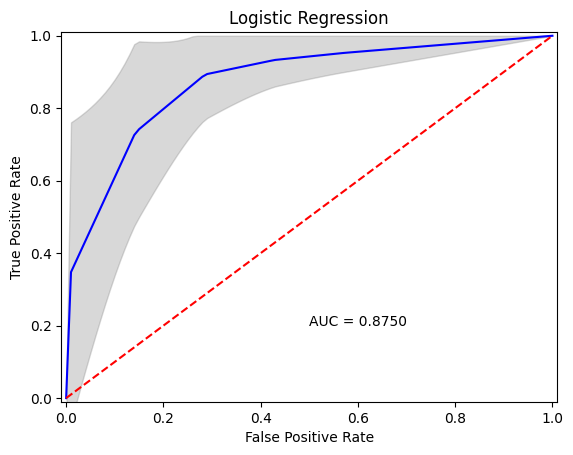


Decision Tree Classifier
2 67.57  ±9.47    70.00 ±16.33   65.14 ±16.80   67.57 ±9.47


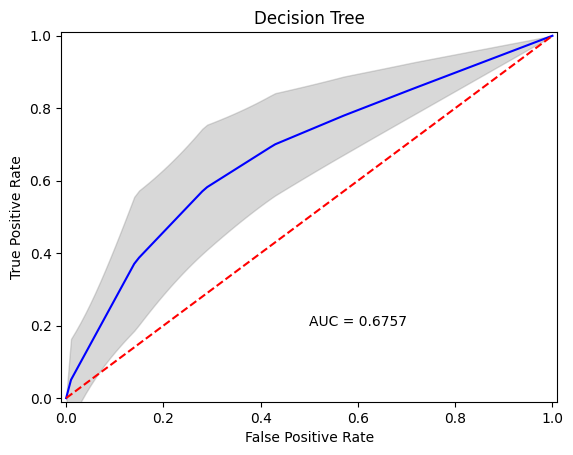


Linear Discriminant Analysis
3 60.71  ±12.55    62.79 ±17.18   58.64 ±21.16   60.71 ±12.55


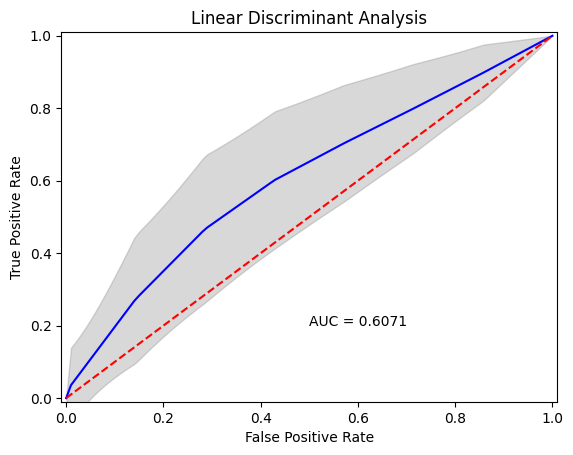


Gaussian Bayes
4 83.89  ±8.16    81.71 ±12.98   86.07 ±13.00   83.89 ±8.16


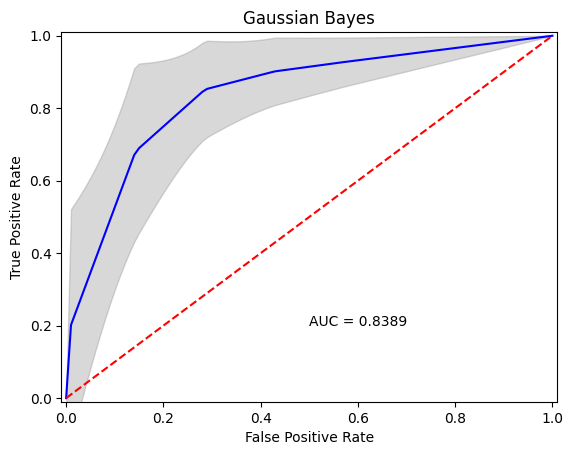


SVM
5 82.43  ±8.47    75.43 ±14.89   89.43 ±11.83   82.43 ±8.47


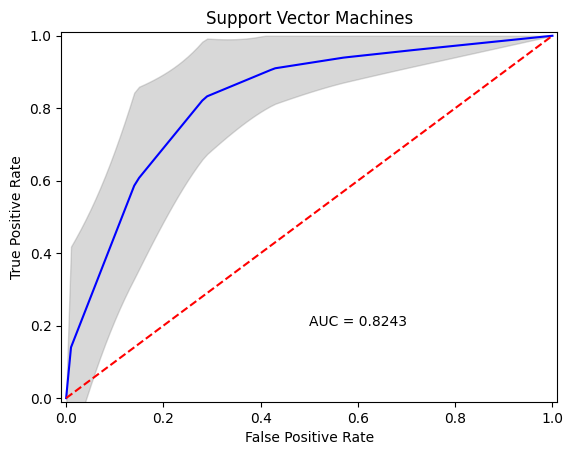


Random Choice
6 49.82  ±13.71    50.36 ±19.37   49.29 ±19.93   49.82 ±13.71


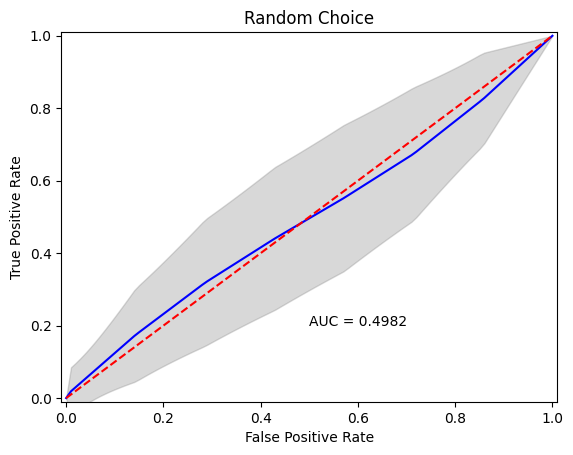


Deep Neural Network
7 81.50  ±9.20    77.93 ±14.94   85.07 ±15.38   81.50 ±9.20


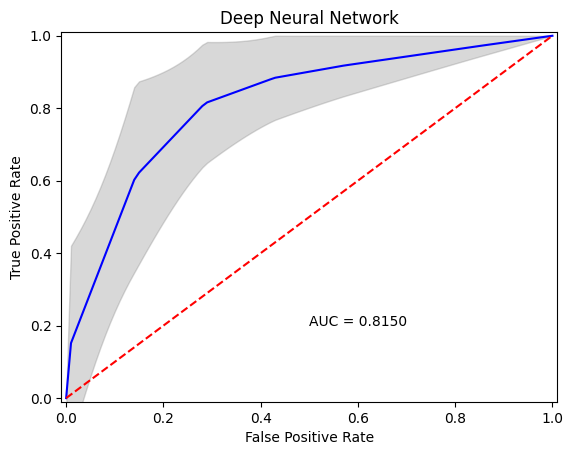


One class SVM
8 51.93  ±14.93    33.86 ±20.01   70.00 ±23.45   51.93 ±14.93


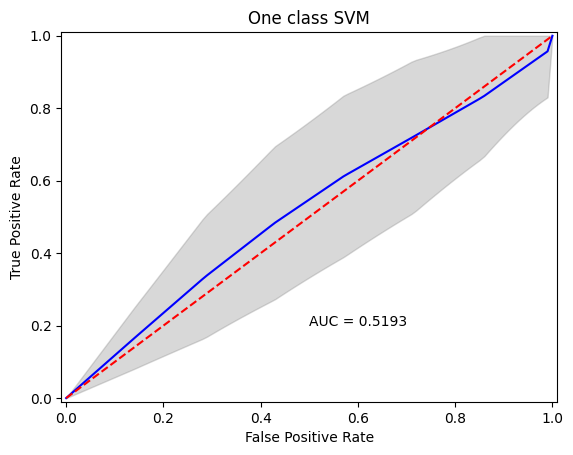


Autoencoder
9 68.04  ±6.28    71.05 ±6.85   59.43 ±21.55   65.24 ±10.25


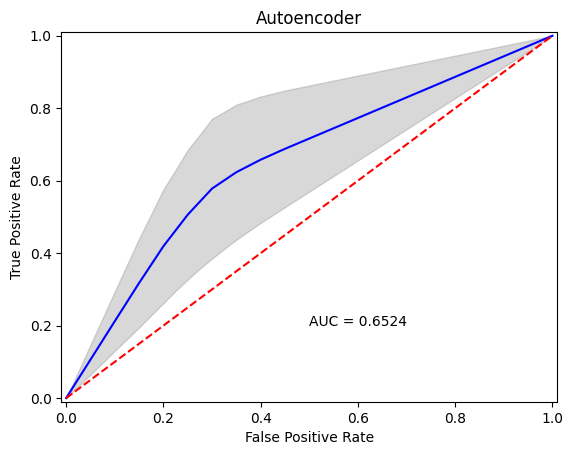


Random Forrest
10 79.96  ±8.67    81.86 ±13.56   78.07 ±15.68   79.96 ±8.67


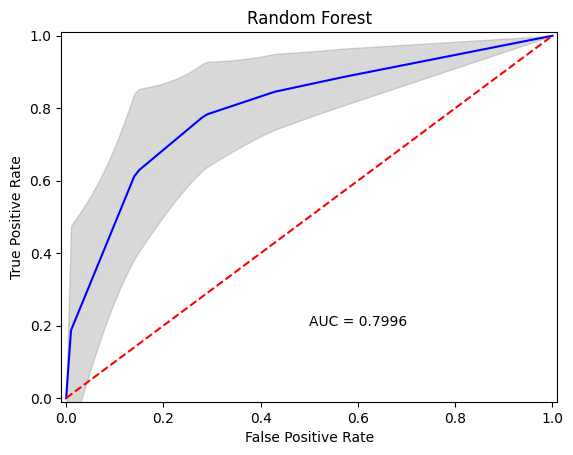

In [8]:
#--------------------------------------
#Deep Neural Network
#--------------------------------------

def DNN(X_train, X_test, y_train, y_test, scaler, class_ratio):
    scaler = scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    lb = LabelBinarizer().fit(y_train)
    y_train = lb.transform(y_train)
    (print(y_train))
    y_test = lb.transform(y_test)

    #balancing the classes
    class_Bad_DBS=float(np.sum(y_train==0))
    class_Good_DBS=float(np.sum(y_train==1))
    class_ratio=class_Good_DBS/class_Bad_DBS

    class_weights = {0:class_ratio, 1:1}

    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.1))
    #model.add(Dense(7, activation='relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # simple early stopping
    #https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
    #from keras.callbacks import EarlyStopping
    #es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

    model.fit(X_train, y_train, epochs=50, class_weight=class_weights, batch_size=5, verbose=0)
    predictions = model.predict(X_test)
    print(predictions)
    predictions = lb.inverse_transform(predictions)
    print(predictions)
    print(y_test)
    y_test = lb.inverse_transform(y_test)
    print(y_test)
    return y_test, predictions


#--------------------------------------
#SVM
#--------------------------------------

def predSVM(classifier, X_train, X_test, y_train, y_test):
    pipe = make_pipeline(StandardScaler(), classifier)
    pipe.fit(X_train)
    y_pred = pipe.predict(X_test)
    y_pred[y_pred==1] = 2.0
    y_pred[y_pred==-1] = 1.0
    return y_test, y_pred, pipe


#--------------------------------------
#Autoencoder
#--------------------------------------

def Autoencoder(scaler, df):
    df1 = df[df['target'] == 1]
    df2 = df[df['target'] == 2]
    #bad DBS effect
    X1 = df1.iloc[:, 0:-1]
    y1 = df1.iloc[:, -1]
    #good and very good DBS effect
    X2 = df2.iloc[:, 0:-1]
    y2 = df2.iloc[:, -1]

    #good and very good DBS effect: splitting for trauining and testing
    X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.33)
    #scaling
    scaler = scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    #bad DBS
    X1 = scaler.transform(X1)

    #Autoencoder
    encoding_dim = 3
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(encoding_dim, activation='relu'))
    model.add(Dropout(0.2))
    model.add((Dense(10, activation='relu')))
    model.add(Dropout(0.2))
    model.add((Dense(X_train.shape[1], activation='linear')))
    model.compile(loss='msle', optimizer='adam', metrics=['mse'])
    history = model.fit(X_train, X_train, epochs=100, batch_size=5,
                        validation_data=(X_train, X_train), verbose=0, shuffle=True)
    #Possible other methods for anomly detection max mae for example

    #good and very good DBS: prediction and errors
    #training
    X_train_pred = model.predict(X_train)
    errors = np.sum(np.square(X_train_pred - X_train)/X_train.shape[1], axis=1)
    threshold = np.mean(errors) + stdev(errors)
    #testing
    X_test_pred = model.predict(X_test)
    errors = np.sum(np.square(X_test_pred - X_test)/X_train.shape[1], axis=1)
    y_pred = [1.0 if err > threshold else 2.0 for err in errors]

    #bad DBS: prediction of outliers
    X1_pred = model.predict(X1)
    errors = np.sum(np.square(X1_pred - X1)/X_train.shape[1], axis=1)
    y1_pred = [1.0 if err > threshold else 2.0 for err in errors] #bloga klase = 1, gera ir labai gera = 2

    #all predictions
    t_vals = np.concatenate([y_test.values, y1.values])
    p_vals = np.concatenate([y_pred, y1_pred])

    return t_vals, p_vals

#----------------------------------------------------------------------------------------
#Classification Methods
#----------------------------------------------------------------------------------------


def REP(X, y, N = 10, scaler = scaler, df=df):

    res_acc = [[], [], [], [], [], [], [], [], [], []]
    res_sens = [[], [], [], [], [], [], [], [], [], []]
    res_spec = [[], [], [], [], [], [], [], [], [], []]
    res_AUC = [[], [], [], [], [], [], [], [], [], []]
    tprs = [[], [], [], [], [], [], [], [], [], []]

    for i in range(N):
        print("Run %d" %(i))

        #split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, stratify=y)
        print("y_test")
        print(y_test)

        #scaling
        scaler = StandardScaler()
        scaler = scaler.fit(X_train)
        X_train = scaler.transform(X_train)
        X_test = scaler.transform(X_test)

        #balancing the classes
        class_Bad_DBS=float(np.sum(y_train==1))
        class_Good_DBS=float(np.sum(y_train==2))
        class_ratio=class_Good_DBS/class_Bad_DBS

        #Classes: 1 - bad DBS, 2 - good and very good DBS
        class_weights = {1:class_ratio, 2:1}
        print(class_weights)


        #----------------------------------------------
        #Classification Methods
        #----------------------------------------------
        #LogReg
        logreg = LogisticRegression(class_weight=class_weights)
        print(y_train)
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)
        print("logreg y_pred")
        print(y_pred)

        acc, sens, spec, AUC, tpr = evaluationR(y_test, y_pred)
        res_acc[0].append(acc)
        res_sens[0].append(sens)
        res_spec[0].append(spec)
        res_AUC[0].append(AUC)
        tprs[0].append(tpr)

        #DecTree
        y_test, y_pred, model = predictionR(DecisionTreeClassifier(class_weight=class_weights), X_train, X_test, y_train, y_test)
        acc, sens, spec, AUC, tpr = evaluationR(y_test, y_pred)
        res_acc[1].append(acc)
        res_sens[1].append(sens)
        res_spec[1].append(spec)
        res_AUC[1].append(AUC)
        tprs[1].append(tpr)

        #Random forrest
        y_test, y_pred, model = predictionR(RandomForestClassifier(), X_train, X_test, y_train, y_test)
        acc, sens, spec, AUC, tpr = evaluationR(y_test, y_pred)
        res_acc[9].append(acc)
        res_sens[9].append(sens)
        res_spec[9].append(spec)
        res_AUC[9].append(AUC)
        tprs[9].append(tpr)

        #Linear Discriminant
        y_test, y_pred, model = predictionR(LinearDiscriminantAnalysis(), X_train, X_test, y_train, y_test)
        acc, sens, spec, AUC, tpr = evaluationR(y_test, y_pred)
        res_acc[2].append(acc)
        res_sens[2].append(sens)
        res_spec[2].append(spec)
        res_AUC[2].append(AUC)
        tprs[2].append(tpr)

        #Naive Bayes
        y_test, y_pred, model = predictionR(GaussianNB(), X_train, X_test, y_train, y_test)
        acc, sens, spec, AUC, tpr = evaluationR(y_test, y_pred)
        res_acc[3].append(acc)
        res_sens[3].append(sens)
        res_spec[3].append(spec)
        res_AUC[3].append(AUC)
        tprs[3].append(tpr)

        #SVM
        y_test, y_pred, model = predictionR(SVC(class_weight=class_weights), X_train, X_test, y_train, y_test)
        acc, sens, spec, AUC, tpr = evaluationR(y_test, y_pred)
        res_acc[4].append(acc)
        res_sens[4].append(sens)
        res_spec[4].append(spec)
        res_AUC[4].append(AUC)
        tprs[4].append(tpr)

        ##RandomC##
        y_pred = []
        for el in y_test:
            y_pred.append(choice([1.0, 2.0]))
        acc, sens, spec, AUC, tpr = evaluationR(y_test, y_pred)
        res_acc[5].append(acc)
        res_sens[5].append(sens)
        res_spec[5].append(spec)
        res_AUC[5].append(AUC)
        tprs[5].append(tpr)

        #DNN
        y_test, y_pred = DNN(X_train, X_test, y_train, y_test, scaler, class_ratio)
        acc, sens, spec, AUC, tpr = evaluationR(y_test, y_pred)
        res_acc[6].append(acc)
        res_sens[6].append(sens)
        res_spec[6].append(spec)
        res_AUC[6].append(AUC)
        tprs[6].append(tpr)

        ##Anomaly detection##

        #One class SVM
        #y_test, y_pred, model = predSVM(OneClassSVM(nu=4/29, gamma=0.005), #split 0.1, 4 bad + 25 good
        #                                X_train, X_test, y_train, y_test)
        y_test, y_pred, model = predSVM(OneClassSVM(nu=7/34, gamma=0.005), #split 0.1, 7 bad + 27 good
                                        X_train, X_test, y_train, y_test)
        acc, sens, spec, AUC, tpr = evaluationR(y_test, y_pred)
        res_acc[7].append(acc)
        res_sens[7].append(sens)
        res_spec[7].append(spec)
        res_AUC[7].append(AUC)
        tprs[7].append(tpr)

        #Autoencoder
        y_test, y_pred = Autoencoder(scaler, df)
        acc, sens, spec, AUC, tpr = evaluationR(y_test, y_pred)
        res_acc[8].append(acc)
        res_sens[8].append(sens)
        res_spec[8].append(spec)
        res_AUC[8].append(AUC)
        tprs[8].append(tpr)


    print("Accuracy %  Sensitivity % Specificity % AUC")

    #LogReg
    print("\nLogistic Regression")
    PRES(1,res_acc[0], res_sens[0], res_spec[0], res_AUC[0], tprs[0], "Logistic Regression")
    #DecTree
    print("\nDecision Tree Classifier")
    PRES(2, res_acc[1], res_sens[1], res_spec[1], res_AUC[1], tprs[1], "Decision Tree")
    #Linear Discriminat
    print("\nLinear Discriminant Analysis")
    PRES(3, res_acc[2], res_sens[2], res_spec[2], res_AUC[2], tprs[2], "Linear Discriminant Analysis")
    #Naive Bayes
    print("\nGaussian Bayes")
    PRES(4, res_acc[3], res_sens[3], res_spec[3], res_AUC[3], tprs[3], "Gaussian Bayes")
    #SVM
    print("\nSVM")
    PRES(5, res_acc[4], res_sens[4], res_spec[4], res_AUC[4], tprs[4], "Support Vector Machines")
    ##RC##
    print("\nRandom Choice")
    PRES(6, res_acc[5], res_sens[5], res_spec[5], res_AUC[5], tprs[5], "Random Choice")
    #NN
    print("\nDeep Neural Network")
    PRES(7, res_acc[6], res_sens[6], res_spec[6], res_AUC[6], tprs[6], "Deep Neural Network")
    ##Anomaly##
    #One Class SVM
    print("\nOne class SVM")
    PRES(8, res_acc[7], res_sens[7], res_spec[7], res_AUC[7], tprs[7], "One class SVM")
    #Autoencoder
    print("\nAutoencoder")
    PRES(9, res_acc[8], res_sens[8], res_spec[8], res_AUC[8], tprs[8], "Autoencoder")
    print("\nRandom Forrest")
    PRES(10, res_acc[9], res_sens[9], res_spec[9], res_AUC[9], tprs[9], "Random Forest")

    np.save('ACC.npy', res_acc)
    np.save('SENS.npy', res_sens)
    np.save('SPEC.npy', res_spec)
    np.save('AUC.npy', res_AUC)
    np.save('TPRS.npy', tprs)

#N_runs=10
N_runs=200

REP(X, y, N_runs)